Understanding the Dataset - Drug Review Dataset


No.1 Drug Review Dataset

Attribute Information:

1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud, STOPWORDS
from spacy.util import minibatch, compounding
from constant import Drug_Review_Train, Drug_Review_Test

In [ ]:
df_train = pd.read_csv(Drug_Review_Train,sep='\t')
df_train.rename(columns={"Unnamed: 0": "UniqueID"}, inplace=True)

In [ ]:
df_train.head()

In [ ]:
df_train.info()

Data preprocessing

In [ ]:
# there are some missing values in condition variable.
df_train.isnull().sum()

There are 899 missing values in the column: condition.

In [ ]:
print("Missing value (%):", 899/df_train.shape[0] *100)

we will delete the missing values since the percentage of missing values is lower.

In [ ]:
df_train = df_train.dropna(axis=0)

In [ ]:
# Q1: How many drugs do we have in training set? The number of unique drugs.
print(len(df_train['drugName'].unique().tolist()))

In [ ]:
df_train['drugName'].value_counts()

In [ ]:
condition_dn = df_train.groupby(['drugName'])['condition'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="black")
plt.xlabel("Drug Name", fontsize = 20)
plt.ylabel("Number of Conditions", fontsize = 20)
plt.title("Top20 : The number of conditions for each drug", fontsize = 20)

In this figure, we can conclude there are lots of drugs can be used in many conditions. 

In [ ]:
df_prednisone = df_train.loc[df_train['drugName'] == 'Prednisone']
print(df_prednisone)

Rating

In [ ]:
rating = df_train['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("Rating", fontsize = 20)
plt.ylabel("Number of Unique IDs", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

In [ ]:
rating_avgs = (df_train['rating'].groupby(df_train['drugName']).mean())
df_ave_rate = pd.DataFrame({"rating_avgs":rating_avgs}) 
df_ave_rate

In [ ]:
plt.figsize = (15, 6)
plt.scatter(df_train.rating, df_train.usefulCount)
plt.xlabel('Rating')
plt.ylabel('usefulcount')
plt.show()

In this scatter plot, we can see the higher the rating, the larger useful counts.

## Text exploration

In [ ]:
#Fetch wordcount
df_train['word_count'] = df_train['review'].apply(lambda x: len(str(x).split(" ")))
df_train[['review','word_count']].head()

In [ ]:
df_train['word_count'].describe()

In [ ]:
text = df_train['review'][2]

In [ ]:
print(text)

In [ ]:
conda install -c conda-forge spacy-model-en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

Create NLP pipeline for textual features

In [ ]:
p_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
stemedList = []

def NLP_pipeline(text):
    # tokenization
    wordlist = word_tokenize(text)

    # stemming
    wordlist = [p_stemmer.stem(word) for word in wordlist]
    # print out stemming list:
    print('stemming:   ',wordlist)

    # Lemmatization
    wordlist = [wordnet_lemmatizer.lemmatize(word) for word in wordlist]
    
    # print out lemmatization list:
    print('lemmatization:  ',wordlist)

    # filter stopwords
    filtered_sentence =[] 
    for word in wordlist:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    wordlist = filtered_sentence
    
    # print out filter stop words:
    print('filter stopwords:   ',wordlist)

    text = ' '.join(wordlist)
    return text


NLP_pipeline(text)

In [ ]:
# pos tagging
print(nltk.pos_tag(list(text)))

 Why to remove stop words?   

Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document.



In [ ]:
# dependency parsing

In [ ]:
from spacy import displacy
sp = spacy.load('en_core_web_sm')
sen = sp(text)
displacy.render(sen, style='dep', jupyter=True, options={'distance': 85})

 TF_IDF

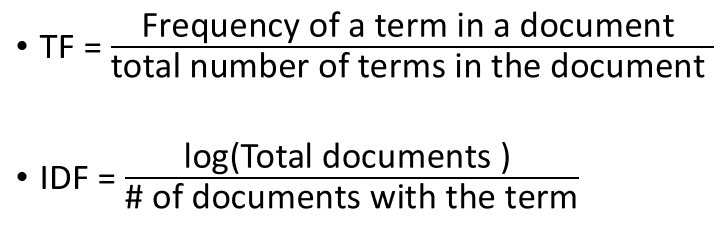

In [ ]:
# vectorize data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [df_train['review'][0], df_train['review'][1], df_train['review'][2], df_train['review'][3]]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)
print(X)

In [ ]:
import spacy
from wordcloud import WordCloud, STOPWORDS
import re
import random

In [ ]:
# process review data
processed_review = ' '
stopwords = set(STOPWORDS) 
for review in df_train['review']: 
    # to lower case
    review = str(review).lower() 
    # split 
    words = review.split()
    processed_review = processed_review + ' '.join(words)


## generate wordcloud


In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(processed_review) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

In [ ]:
# Conclusion of understanding attributes and relationships


1. Most of the commonest drugs are hormonal drugs.
2. The most commonest condition is birth control, followed by depression and pain and anxiety.
3. Prednisone can be used in many conditions, for example, asthma, skin rash, bursitis, inflammatory conditions and so on.
4. As the rating goes up, the usefulcount goes up.


In [ ]:
# Vectorize data

Term Frequency-Inverse Document Frequency (TF-IDF)
![image.png](attachment:image.png)

Two Reviews: 

Review 1(ID: 206461) “It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil” 

Review 2(ID: 80520)   “Reduced my pain by 80% and lets me live a normal life again”


Vocabulary: ['80', 'again', 'and', 'by', 'bystolic', 'combination', 'effect', 'fish', 'has', 'in', 'it', 'lets', 'life', 'live', 'me', 'mg', 'my', 'no', 'normal', 'of', 'oil', 'pain', 'reduced', 'side', 'take']


Vectorize text:

review_1 = [0,0,0.175, 0, 0.246, 0, 0.246, 0.246, 0.246, 0.246, 0.492, 0, 0, 0, 0, 0.246, 0, 0.246, 0, 0.246, 0.246, 0, 0, 0.246, 0.246]

review_2 = [0.295, 0.295, 0.210, 0.295, 0, 0, 0, 0, 0, 0, 0, 0.295, 0.295, 0.295, 0.295, 0, 0.295, 0, 0.295, 0,0, 0.295, 0.295, 0, 0]


In [ ]:
# codes to generate dataframe

In [ ]:
import pandas as pd
from tqdm import tqdm

def convert_to_df(file_path: str) -> pd.DataFrame:
    """Convert documents to DataFrame

       Args:

       file_path (str): Path to train/dev/test files
    """
    instances = []
    with open(file_path, "r") as f:
    # Process the file line by line
        for line in tqdm(f.readlines(), desc=f"Process {file_path}"):
            if line.startswith("###") or len(line.strip()) == 0:
    # Lines with ### or blank lines can be ignored
                next
            else:
                label, text = line.split("\t")
                instances.append({"sentence": text, "label": label})
    return pd.DataFrame(instances)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_test = pd.read_csv("drugsComTest_raw.tsv",sep='\t')
df_test.rename(columns={"Unnamed: 0": "UniqueID"}, inplace=True)

In [ ]:
df_test.head()

In [ ]:
df_test.info()